In [1]:
# Install Tensorflow
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 43kB/s 
     |████████████████████████████████| 3.1MB 47.2MB/s 
     |████████████████████████████████| 501kB 43.0MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.0b1 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.


In [2]:
import tensorflow as tf
print(__version__)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

NameError: ignored

In [0]:
print(tf.__version__)

2.0.0-beta1


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Load in the data 
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:, 1]

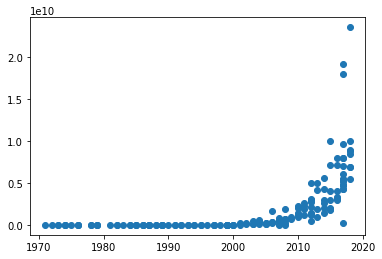

In [0]:
# Plot the data - it is exponential!
plt.scatter(X, Y)

In [0]:
data[-5:-1]

array([[       2017, 18000000000],
       [       2017, 19200000000],
       [       2018,  8876000000],
       [       2018, 23600000000]])

In [0]:
X[1:5]

array([[1972],
       [1973],
       [1973],
       [1974]])

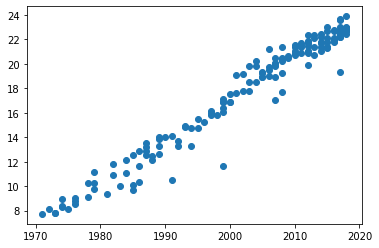

In [0]:
# Since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X, Y)
# that's better

In [0]:
# Let's also center the X data so the values are not too large
# We could scale it too but then we do have to reverse the transformation later
X = X - X.mean()

In [0]:
# Now create our Tensorflow model
model = tf.keras.models.Sequential([
                                    
      tf.keras.layers.Input(shape=(1,)),
      tf.keras.layers.Dense(1)
])

In [0]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

In [0]:
# learning rate scheduler 
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [0]:
# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 497us/sample - loss: 315.9991
Epoch 2/200
162/162 [==============================] - 0s 83us/sample - loss: 295.6122
Epoch 3/200
162/162 [==============================] - 0s 80us/sample - loss: 282.4866
Epoch 4/200
162/162 [==============================] - 0s 86us/sample - loss: 245.3443
Epoch 5/200
162/162 [==============================] - 0s 86us/sample - loss: 184.4711
Epoch 6/200
162/162 [==============================] - 0s 85us/sample - loss: 167.6874
Epoch 7/200
162/162 [==============================] - 0s 93us/sample - loss: 99.4901
Epoch 8/200
162/162 [==============================] - 0s 98us/sample - loss: 68.3792
Epoch 9/200
162/162 [==============================] - 0s 77us/sample - loss: 46.4574
Epoch 10/200
162/162 [==============================] - 0s 79us/sample - loss: 37.4657
Epoch 11/200
162/162 [==============================] - 0s 76us/sample - loss: 28.8719
Epoch 12/200
162/162 [==

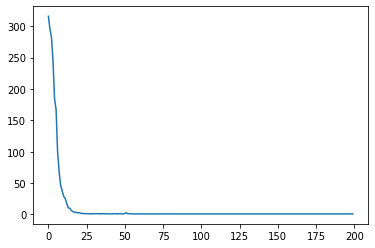

In [0]:
# Plot the loss
plt.plot(r.history['loss'], label=['loss'])

In [0]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers) # Note: there is only 1 layer, the "input" layer doesn't count
print(model.layers[0].get_weights())

[array([[0.346657]], dtype=float32), array([17.763733], dtype=float32)]


In [0]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]

In [0]:
print("Time to double:", np.log(2)/a)

Time to double: 1.999518730902411


In [0]:
# If you know the analytical solution
X = np.array(X).flatten()
Y = np.array(Y)

denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean() * X.sum() ) / denominator
b = ( X.mean()  * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)
print("Time to double: ", np.log(2) / a)

0.341682487387313 4.6198787793639325e-14
Time to double:  2.0286295205239204


#**Part 2: Making Predictions**

In [0]:
data[:,0]

array([1971, 1972, 1973, 1973, 1974, 1974, 1974, 1975, 1976, 1976, 1976,
       1978, 1978, 1979, 1979, 1979, 1981, 1982, 1982, 1983, 1984, 1984,
       1985, 1985, 1985, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988,
       1988, 1989, 1989, 1989, 1989, 1990, 1991, 1991, 1992, 1992, 1993,
       1993, 1994, 1994, 1995, 1999, 1995, 1996, 1997, 1997, 1997, 1998,
       1999, 1999, 2000, 2000, 1999, 1999, 1999, 2000, 2001, 2001, 2002,
       2004, 2004, 2005, 2006, 2005, 2006, 2007, 2008, 2003, 2003, 2002,
       2005, 2005, 2006, 2007, 2003, 2008, 2009, 2011, 2012, 2007, 2007,
       2008, 2004, 2007, 2008, 2008, 2007, 2009, 2010, 2012, 2013, 2011,
       2010, 2010, 2012, 2012, 2010, 2012, 2014, 2006, 2015, 2013, 2015,
       2008, 2010, 2014, 2015, 2015, 2012, 2011, 2010, 2014, 2011, 2012,
       2014, 2016, 2017, 2017, 2018, 2012, 2016, 2016, 2015, 2013, 2017,
       2014, 2017, 2017, 2017, 2012, 2013, 2014, 2017, 2018, 2016, 2018,
       2017, 2018, 2017, 2015, 2017, 2016, 2017, 20